In [2]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp


In [3]:
current_dir = os.getcwd()
longformdata = pd.read_csv('longformdata_DF.csv')
longformdata.head()

,PROLIFIC_ID,condition_recode,afterstresschange,salience_mean,stress_mean,recoded_stress,choice,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,choicedifference_rejneu,playlottery
0,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2.0,34.0,0.0,21,0.166667,1.0
1,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2.0,34.0,0.0,21,0.166667,1.0
2,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2.0,34.0,0.0,21,0.166667,1.0
3,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2.0,34.0,0.0,21,0.166667,1.0
4,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2.0,34.0,0.0,21,0.166667,1.0


In [4]:
longformdata.columns

Index(['PROLIFIC_ID', 'condition_recode', 'afterstresschange', 'salience_mean',
       'stress_mean', 'recoded_stress', 'choice', 'rej-acc', 'ifnegvalue',
       'choicertmean', 'timebetween', 'age', 'sex', 'order',
       'choicedifference_rejneu', 'playlottery'],
      dtype='object')

In [5]:
feature_cols = ['condition_recode', 'age', 'sex', 'timebetween', 'order', 'stress_mean']
x=longformdata[feature_cols]
y=longformdata.playlottery

In [7]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,max_iter=10000)

# fit the model with data
logreg.fit(x, y)

y_pred = logreg.predict(x)

In [8]:
cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[1301,   83,    0],
       [ 880,  111,    0],
       [ 135,   10,    0]])

NameError: name 'Text' is not defined

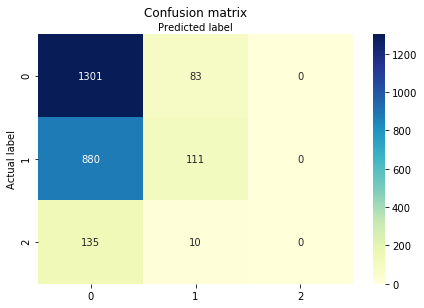

In [19]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#(0.5,257.44,'Predicted label');

In [22]:
from sklearn.metrics import classification_report
target_names = ['neutral', 'rej', 'acc']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     neutral       0.56      0.94      0.70      1384
         rej       0.54      0.11      0.19       991
         acc       0.00      0.00      0.00       145

    accuracy                           0.56      2520
   macro avg       0.37      0.35      0.30      2520
weighted avg       0.52      0.56      0.46      2520



/Users/jordansiegel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jordansiegel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jordansiegel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [23]:
y_pred_proba = logreg.predict_proba(x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: multiclass format is not supported